# Project Proposal

_March 12 2025 | Chen Kai Zhang | 014806701_

## Introduction

As an avid follower and contributor to the US stock market, I've come to realize that a deep understanding of the market is crucial for making informed investment decisions. Recently, I've ventured into high-frequency trading (HFT), sparking my interest in exploring the relationship between common economic indicators and stock prices. This project presents itself as the perfect opportunity to align my interests with my coursework.

My features of interests (FOI) for this dataset are :

- Open/Close/High/Low
- Volume
- Volatility Index (VIX)
- Interest Rate

... which play considerable roles in determining HFT strategies, making it essential to not only understand what they do and what they can indicate about the market during a period of time, thus the following questions : 

1. What is the relationship between stock price, trading volume, VIX, and interest rates?
2. If a relationship exists, is there a discernible pattern in price movements based on those indicators
3. How do other features included in the dataset influence stock price?
4. Given one of the 4 FOI, is it possible to predict its impact on any of the other FOI.

By the end of this project, I hope to develop strong understanding of these market indicators and utilize that knowledge to be more successful in my HFT journey.

## Data

**Source** : [Kaggle NASDAQ Dataset](https://www.kaggle.com/datasets/sai14karthik/nasdq-dataset)

**Author** : Sai Karthik

**Data Collection** :

Data was extracted by fetching from popular and reputable financial APIs and databases :

- **Yahoo Finance** : historical stock prices
- **Federal Reserve Economic Data (FRED)** : economic indicators (interest rates, VIX, etc)
- **Alpha Vantage** : gold and oil prices

... therefore I would assume a script was developed to iterate through each stock price from Yahoo Finance and append the corresponding day data from FRED and Alpha Vantage.

**Type of Study**

Since the data was extracted from historical readings, it is an **observational study**.

**Cases**

Each row in the dataset represents each feature's statistic from **January 01 2010** to **October 24 2024**.

**Variables/Features**

The bolded features are the main ones I'm interest in, but I will be observing all of them

- Date : date format in YYYY-MM-DD (string)
- Open : price stock opened at (float USD)
- Close : price stock closed at (float USD)
- High : highest price stock achieved (float USD)
- Low : lowest price stock achieved (float USD)
- Volume : shares traded (.00 float)
- Interest Rate : prevailing interest rate (float)
- Exchange Rate : exchange rate for USD against other currencies (float)
- VIX : measure of market risk (float)
- Gold : gold price (float USD)
- Oil : oil price (float USD)
- TED Spread : banking system credit risk (float)
- EFFR : interest rates between depository institutions (float)

## Data Quality

In [87]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Getting the dataset

dataset_path = "./datasets/nasdaq.csv"

nasdaq_df = pd.read_csv(dataset_path)
nasdaq_df.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000


In [89]:
# Checking for data types
nasdaq_df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
InterestRate    float64
ExchangeRate    float64
VIX             float64
TEDSpread       float64
EFFR            float64
Gold            float64
Oil             float64
dtype: object

In [90]:
# Checking the shape of our dataset (for reference)
nasdaq_df.shape

(3914, 13)

In [91]:
# Checking for duplicates
nasdaq_df.duplicated().sum()

np.int64(0)

Great, there seems to be no duplicates in our data!

In [92]:
# Checking for missing values
nasdaq_df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
InterestRate    0
ExchangeRate    0
VIX             0
TEDSpread       0
EFFR            0
Gold            0
Oil             0
dtype: int64

Great, seems like there are no missing values!

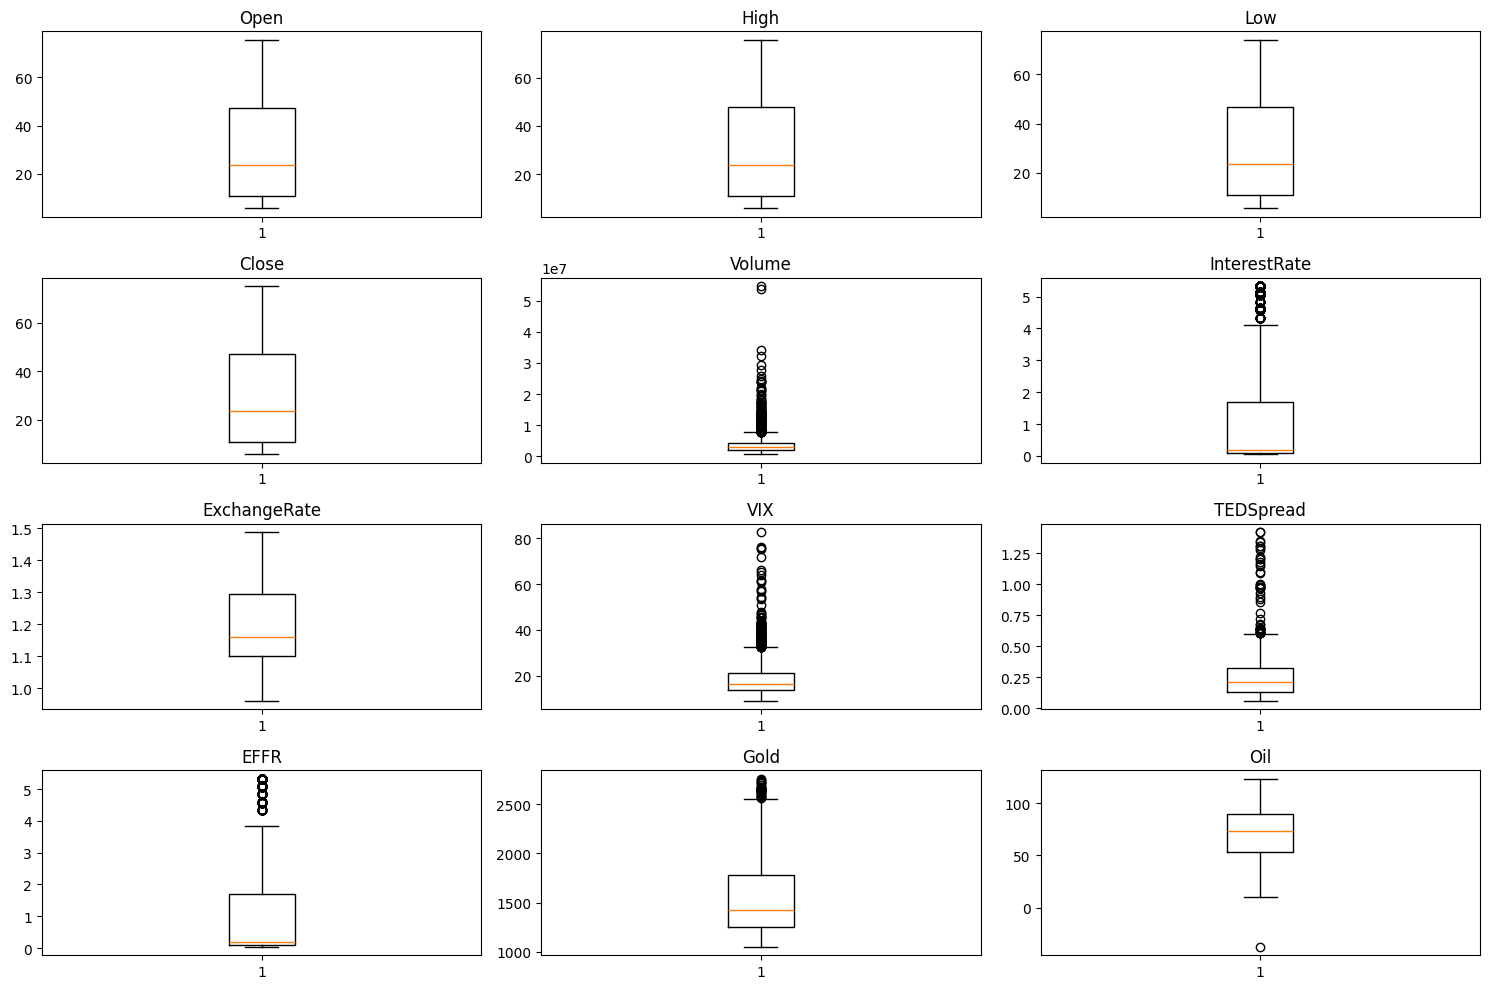

In [93]:
# Checking for outliers
def show_outliers(df):
    plt.figure(figsize=(15,10))
    for i, col in enumerate(df.columns, 1):
        plt.subplot(4, 3, i)
        plt.boxplot(df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
    
show_outliers(nasdaq_df.select_dtypes(["float64"]))

Seems like we have outliers for **Volume**, **Interest Rate**, **VIX**, **TED Spread**, **EFFR**, and **Gold**. Let's handle those outliers.

We will use IQRs to find the lower and upper limit, and then cap the outlier values to be within those boundaries.

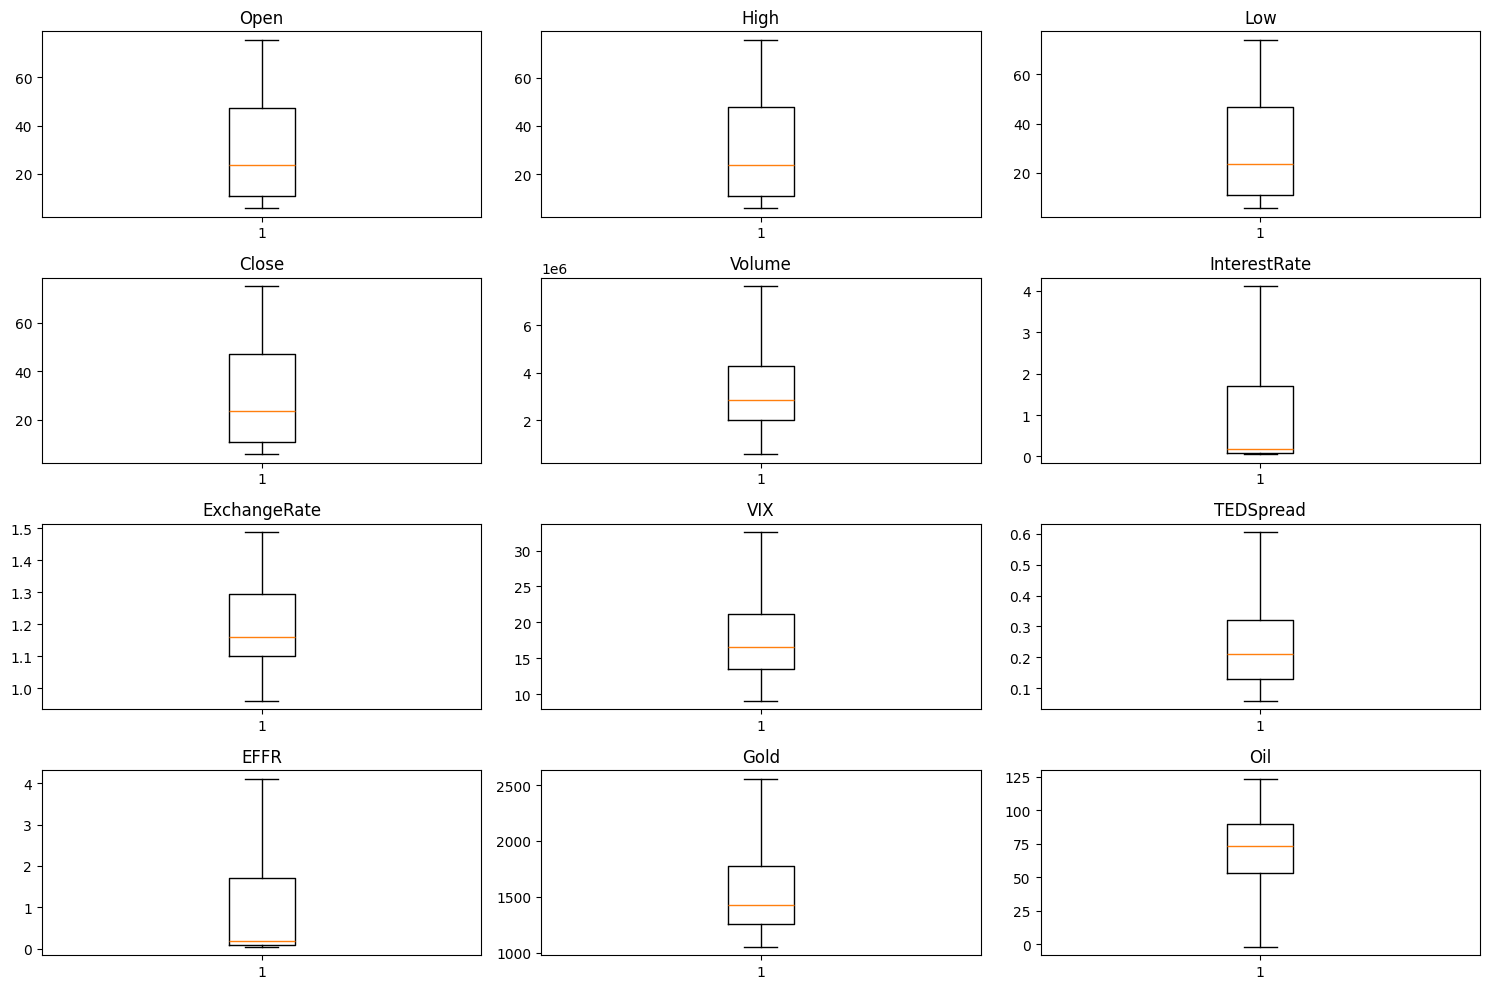

In [94]:
numeric_cols = nasdaq_df.select_dtypes(['float64']).columns

Q1 = nasdaq_df[numeric_cols].quantile(0.25)
Q3 = nasdaq_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

limits = pd.DataFrame({'lower_limit': lower_bound, 'upper_limit': upper_bound})

# Capping outliers
for col in numeric_cols:
    nasdaq_df.loc[nasdaq_df[col] < limits.loc[col, 'lower_limit'], col] = limits.loc[col, 'lower_limit']
    nasdaq_df.loc[nasdaq_df[col] > limits.loc[col, 'upper_limit'], col] = limits.loc[col, 'upper_limit']

show_outliers(nasdaq_df.select_dtypes(['float64']))

By capping out the outliers instead of deleting them, we can preserve the full dataset while reducing the impacts of extreme values.

In [95]:
# Checking the summary of our data
nasdaq_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3914.0,2.921865e+01,1.966939e+01,5.820000,1.099500e+01,2.370833e+01,4.737500e+01,7.560000e+01
High,3914.0,2.949157e+01,1.984092e+01,5.916667,1.110167e+01,2.385833e+01,4.780750e+01,7.568000e+01
Low,3914.0,2.894384e+01,1.948650e+01,5.726667,1.089000e+01,2.357500e+01,4.680500e+01,7.405000e+01
Close,3914.0,2.922693e+01,1.966867e+01,5.766667,1.102417e+01,2.373333e+01,4.733000e+01,7.524000e+01
Volume,3914.0,3.419295e+06,1.847580e+06,575400.000000,2.035875e+06,2.834950e+06,4.276500e+06,7.637438e+06
InterestRate,3914.0,1.064557e+00,1.394853e+00,0.050000,9.000000e-02,1.900000e-01,1.700000e+00,4.115000e+00
ExchangeRate,3914.0,1.191561e+00,1.137331e-01,0.961600,1.100000e+00,1.159100e+00,1.295575e+00,1.487500e+00
VIX,3914.0,1.806939e+01,5.802390e+00,9.140000,1.357000e+01,1.660500e+01,2.115750e+01,3.253875e+01
TEDSpread,3914.0,2.372892e-01,1.309767e-01,0.060000,1.300000e-01,2.100000e-01,3.200000e-01,6.050000e-01
EFFR,3914.0,1.063606e+00,1.395220e+00,0.040000,9.000000e-02,1.900000e-01,1.700000e+00,4.115000e+00


Nothing looks out of the ordinary. I will point out that Volume has some extremely high values but that is to be expected since millions of shares are being traded on a daily bases while most other features in this dataset will never be represented to numbers anywhere to that extreme. We should deal with it when doing data analysis, but for now it's fine.

<Axes: >

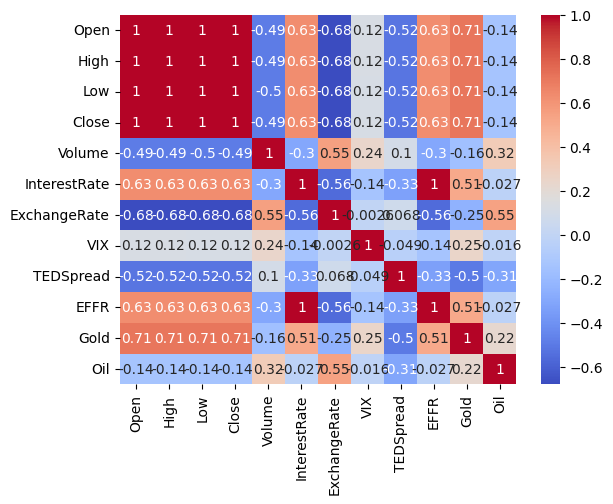

In [96]:
# Running a quick correlation heatmap to check for redundancy
sns.heatmap(nasdaq_df.select_dtypes(['float64']).corr(), annot=True, cmap="coolwarm")

After running a correlation heatmap, it seems like the only one I should consider dropping is **EFFR** since it appears like it has a perfect linear relationship with **Interest Rate**, which is a feature I'm definitely more interested in. I could also just keep one of the stock price statistic (**Open**, **Close**, **Low**, or **High**), but I will keep all of them since they are important to me personally when looking at stock prices.

<Axes: >

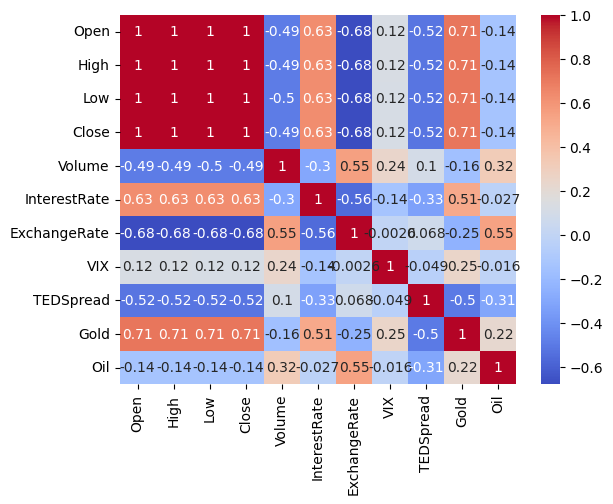

In [97]:
nasdaq_df = nasdaq_df.drop(columns=["EFFR"])
sns.heatmap(nasdaq_df.select_dtypes(['float64']).corr(), annot=True, cmap="coolwarm")

## Summary

Lets go over what we have so far :

- The [Kaggle NASDAQ Dataset](https://www.kaggle.com/datasets/sai14karthik/nasdq-dataset) shows the prices of NASDAQ from **January 01 2010** to **October 24 2024** (found on the site)
- Out of the box, the dataset is pretty clean, but we did need to :
    - cap outliers in a few features
    - remove **EFFR** since it was redundant with **Interest Rate**
    - CHOOSE to keep all four stock price statics (**Open**, **Close**, **Low**, or **High**)

Overall, I'm happy with this dataset and very excited to explore it even deeper!